# Graphing and Visualization

This notebook will present you with an overview of the tools that will help you use matplotlib.

#### References
- [Matplotlib homepage](http://matplotlib.org/)
- [Great Charting Examples](https://medium.com/python-in-plain-english/creating-50-stunning-charts-in-python-the-basics-with-a-twist-7e63764f2b9d)

The main tool that we will be using to visualize data is the python package Matplotlib.
Matplotlib is incredibly powerful, and can be used to produce publication quality plots and figures, but Matplotlib is also incredibly easy to use.
Most of the plotting we will be doing will be done through Matplotlib's pyplot library.

To show how powerful matplotlib is, consider the following example.
For this, we'll look at a plot of the mandelbrot set taken from the [NumPy quickstart guide](https://numpy.org/doc/stable/user/quickstart.html).

To see it, just execute the cell below.

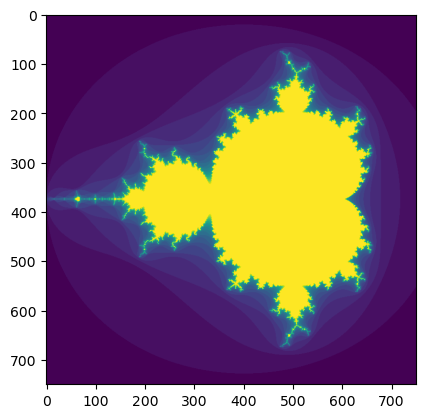

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(h,w, maxit=25):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)
    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)     # who is diverging now
        divtime[div_now] = i                     # note when
        z[diverge] = 2                           # avoid diverging too much
    return divtime
plt.imshow(mandelbrot(750,750))
plt.show()

While this may be a really great example of what you can create using Matplotlib, it's best to just start at the beginning with a simple example.

## A. Line and Scatter Plots

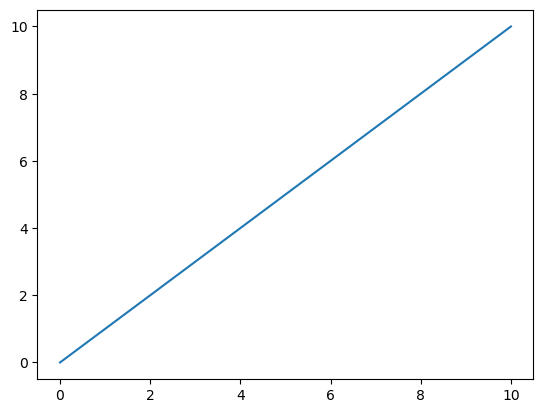

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

y = [x for x in range(11)]
#print(y)
plt.plot(y)
plt.show()

Let's look at how we made this.

What is this doing?

```python
%matplotlib inline
```
Is an example of what's known as a "magic" function for jupyter notebooks.
Basically all it does is place the image of your plot in the notebook.
If you don't include `%matplotlib inline`, it will open this image on your desktop.

_Note: this only works with jupyter notebooks. The code will break if you include this in a python (.py) file. You also can't place comments on this line, as I just found out..._

The import statement isn't anything you haven't seen before, however we're not bringing in everything from matplotlib. Instead we are simply using the pyplot library.
In the import statement
```python
import matplotlib.pyplot as plt
```
The notation `matplotlib.pyplot` is simply pointing to pyplot, which is in `matplotlib`.
The "." is akin to a "/" in a file path.

Let's move on to the actual logic of the code.
```python
y = [x for x in range(11)]
plt.plot(y)
plt.show()
```
This is where we are actually generating the plot.
The first line should be familiar to you by now.
We're just using a list comprehension to create a list of integers from 0 to 10.
The next line
```python
plt.plot(y)
```
is what creates the plot in memory, and
```python
plt.show()
```
is what generates the image.

When you pass `plt.plot()` an interable object, in this case a list, it generates a 2D plot using the data in the object as the $y$ value, and the index as the $x$ value (using standard $xy$ plane notation).
If you want to use values for the $x$-axis that are different than the index, you can pass the `plot()` function two arguments.
The first argument is for the $x$ values, and the second argument is for the $y$ values.
To demonstrate this, check the example below, now with comments.

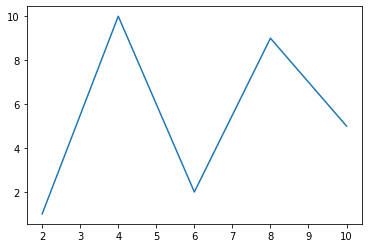

In [3]:
%matplotlib inline               
import matplotlib.pyplot as plt  # import matplotlib

x = [2, 4, 6, 8, 10]             # x-axis values
y = [1, 10, 2, 9, 5]             # y-axis values
plt.plot(x, y)                   # generate plot
plt.show()                       # display the plot

You are also able to pass `plot()` a third argument that specifies the way the data is displayed as a color, symbol pair.

Colors:
- k: Black
- b: Blue
- g: Green
- r: Red
- y: Yellow

Symbols:
- '`-`': Line
- '`.`': Small dot
- '`o`': Large dot
- '`*`': Star

For example, r*, plots in red using * for (x, y) points.


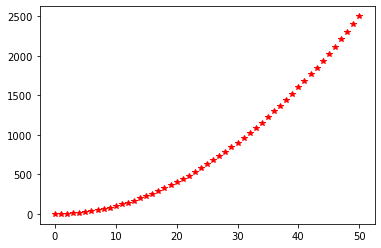

In [4]:
%matplotlib inline               
import matplotlib.pyplot as plt  # import matplotlib

x = [x for x in range(51)]       
y = [x**2 for x in x]            # square the elements of x

plt.plot(x, y, 'r*')             # generate plot, using black dots for data points
plt.show()                       # display the plot

### Checkpoint

Go ahead and try different combinations in the code above to see what happens.

This is a start, but it's always a good idea to label your plot.
Every plot should have a title, and labels on the axes.
We do this with the functions
- `plt.title()`
- `plt.xlabel()`
- `plt.ylabel()`

You'll also notice that with the labels the use of standard $\LaTeX$ markup - wrapping a part of the string with dollar signs `"$ $"` - is allowed.
This is what makes the labels look so cool.

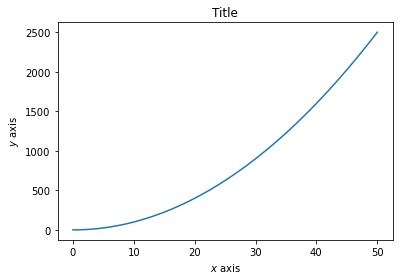

In [5]:
%matplotlib inline               
import matplotlib.pyplot as plt  # import matplotlib

x = [x for x in range(51)]       
y = [x**2 for x in x]            # square the elements of x

plt.title('Title')               # plot the title
plt.xlabel('$x$ axis')           # plot the x-axis label
plt.ylabel('$y$ axis')           # plot the y-axis label
plt.plot(x, y)                   # generate plot
plt.show()                       # display the plot

## B. NumPy

NumPy is the standard scientific computing package for python.

See [NumPy quickstart guide](https://numpy.org/doc/stable/user/quickstart.html).

The first thing we will need to do is import NumPy.
To do this we include the following to our import statements.
```python
import numpy as np
```

After we import NumPy, we will use NumPy's random library to generate random data.
```python
import numpy as np

x = np.random.randn(100)
```
Here we have generated 100 data points drawn from the standard normal distribution.
This does introduce a new data type though: the NumPy array.

NumPy arrays are incredible powerful, and can be used to create n-dimensional arrays, matrices, and essential storage solutions for data.

In all of the following examples, you'll find this line of code.
```python
import numpy as np

np.random.seed(937)
```
What we are doing here is _seeding_ the random number generator.
Simply put, this is used to ensure that we are all getting the same "random" numbers.


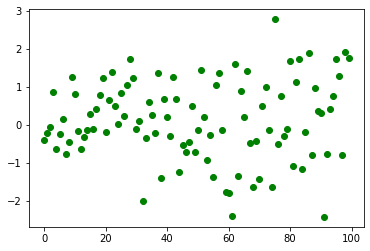

In [6]:
%matplotlib inline               
import matplotlib.pyplot as plt     # import matplotlib
import numpy as np                  # import numpy
np.random.seed(937)                 # set seed for number generation

x = np.random.randn(100)            # generate random data
#print(x)
plt.plot(x, 'go')                   # generate plot
plt.show()                          # display the plot

## C. Histograms and BoxPlots

Now lets take our randomly generated data and plot it using a histogram.

Histograms are generated using the `hist()` function in pyplot.
The `hist()` function takes two arguments, the data, and the number of bins that are created for the histogram. 

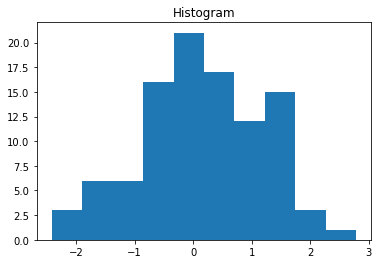

In [7]:
%matplotlib inline               
import matplotlib.pyplot as plt     # import matplotlib
import numpy as np                  # import numpy
np.random.seed(937)                 # set seed for number generation

x = np.random.randn(100)            # generate random data

plt.hist(x, 10)                     # generate plot
plt.title("Histogram")              # generate title
plt.show()                          # display the plot

As we move on to boxplots, we have to look at an additional feature of NumPy arrays.
Every array that we have generated thus far has been a 1-dimensional array.
That is, the arrays have been equivalent to a list.
In order to plot box plots that make sense, we need a 2 dimensional array.
To do this we use the `reshape()` method, which will take our 1-dimensional array, and turn it into an array made up of column vectors.
We will be passing the `reshape()` method two arguments, the first is the number of rows, the second is the number of columns.
```python
x = np.random.randn(100).reshape(25, 4)
```
Here we have taken our 100 data points and put them into 25 rows of 4 columns each.
We will use the columns as our grouping for the boxplots.
Think of these as different treatment groups in an experiment.

To turn our array into a boxplot, we will use the pyplot function `boxplot()`.
```python
plt.boxplot(x, labels=labels)
```
Once again, `boxplot()` take the data as the first argument.
We are also going to pass it a second argument that defines the group names.
This is an optional argument however.
If nothing was passed for the group names, it would simply number the groups. 

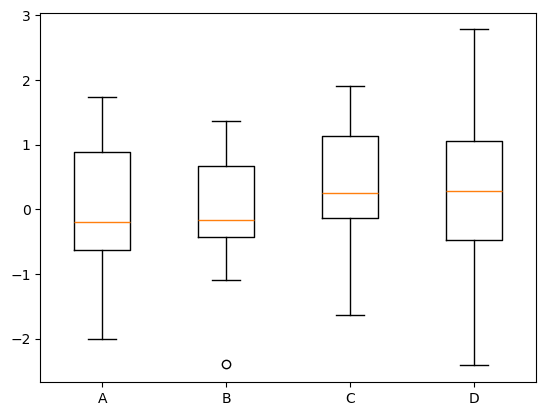

In [6]:
%matplotlib inline               
import matplotlib.pyplot as plt           # import matplotlib
import numpy as np                        # import numpy
np.random.seed(937)                       # set seed for number generation

x = np.random.randn(100).reshape(25, 4)   # generate random data

groups = ['A', 'B', 'C', 'D']             # define group names
plt.boxplot(x, labels=groups)             # generate plot
plt.show()                                # display the plot

## D. Plotting Discrete Supply and Demand Curves

We will be look at how to construct discrete supply and demand graphs using matplotlib.
For this, we will be generating curves from three lists.
The first is a list of units available.
```python
units = [units for units in range(9)]
```
The second is a list of reservation prices indicating the maximum buyers are willing to pay corresponding to each unit produced.
```python
demand_price = [10, 9, 8, 7, 6, 5, 4, 3, 2]
```
The third is a list of unit costs for sellers corresponding to each unit produced.
```python
supply_price = [0, 2, 3, 4, 5, 6, 7, 8, 9]
```

There are a couple more lines of code that you may be unfamilar with.
```python
plt.step(x, y)
```
Generates a step plot, with the $x$ value first, and the $y$ value second.


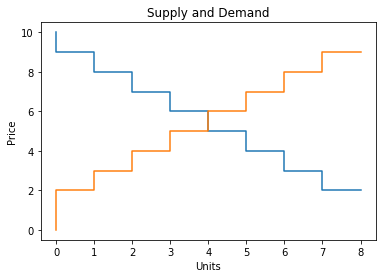

In [9]:
%matplotlib inline               
import matplotlib.pyplot as plt                 # import matplotlib
import numpy as np                              # import numpy

"""
First define supply and demand curves
"""
units = [units for units in range(9)]           # unit number
demand_price = [10, 9, 8, 7, 6, 5, 4, 3, 2]     # note first element of list is not part of demand
supply_price = [0, 2, 3, 4, 5, 6, 7, 8, 9]      # note first element of list is not part of supply

"""
Then plot the curves
"""
plt.step(units, demand_price, label='Demand')   # generate the demand plot
plt.step(units, supply_price, label='Supply')   # generate the supply plot
plt.title('Supply and Demand')                  # add the title
plt.xlabel('Units')                             # add the x axis label
plt.ylabel('Price')                             # add the y axis label
plt.show()                                      # display the plot

### Checkpoint
to add a legend insert thie line after `plt.title`

```python
plt.legend(bbox_to_anchor=(0.65, 0.98))
```

As you get better making graphs you will want to improve their appearance for presentations and publications.  A good starting reference is by [Randal Olson](http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/).

Below we apply some of his ideas.

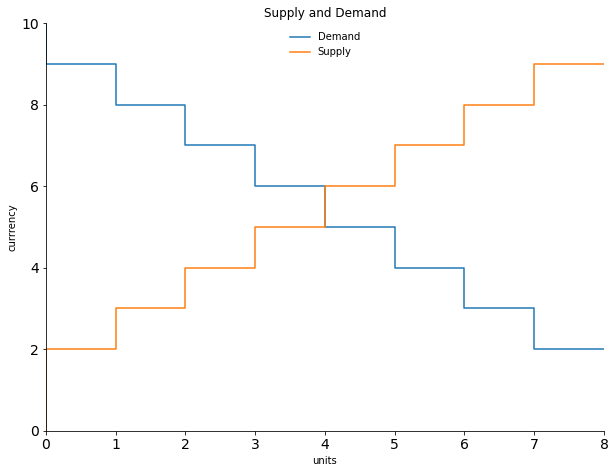

In [10]:
"""
First define supply and demand curves
"""
units = [units for units in range(9)]           # unit number
demand_price = [10, 9, 8, 7, 6, 5, 4, 3, 2]     # note first element of list is not part of demand
supply_price = [0, 2, 3, 4, 5, 6, 7, 8, 9]      # note first elemnt of list is not part of supply

"""
This is new
"""
plt.figure(figsize=(10, 7.5)) # Set plot dimensions  
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)     
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
plt.yticks(fontsize=14)    
plt.xticks(fontsize=14)

"""
Made a bunch of small changes here
"""

plt.step(units, demand_price, label='Demand')
plt.step(units, supply_price, label='Supply')
ax = plt.gca()
plt.legend(loc = 'upper center',frameon=False)
plt.title('Supply and Demand')
plt.xlabel('units')
plt.ylabel('currrency')

# Save figure in the working directory
plt.savefig('supply_demand.jpg')

plt.xlim(0, 8)
plt.ylim(0, 10)
plt.show()